# Ensemble Models

## Voting Classifier

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

### Data

In [18]:
wine= pd.read_csv('white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [20]:
wine['alcohol'].fillna(wine['alcohol'].mean(),inplace=True)

In [21]:
wine['label']=np.where(wine['quality']>6,1,0)
X=wine[['density','alcohol']]
y=wine['label']

### Data Splitting

In [12]:
X_train, X_test, y_train, y_test= train_test_split(
    X,y,
    stratify=y,
    test_size=0.2,
    random_state=2020
    )

#### Stand alone models

In [11]:
lr= LogisticRegression()
knn=KNeighborsClassifier(n_neighbors=3)
dt=DecisionTreeClassifier(max_depth=5)

In [13]:
for model, model_name in zip([lr,knn,dt],['Logistic Regression','KNN', 'Decision Tree']):
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    print(model_name + ':')
    print(classification_report(y_test,y_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        84
           1       0.75      0.45      0.56        20

    accuracy                           0.87       104
   macro avg       0.82      0.71      0.74       104
weighted avg       0.86      0.87      0.85       104

KNN:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        84
           1       0.75      0.75      0.75        20

    accuracy                           0.90       104
   macro avg       0.85      0.85      0.85       104
weighted avg       0.90      0.90      0.90       104

Decision Tree:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        84
           1       1.00      0.90      0.95        20

    accuracy                           0.98       104
   macro avg       0.99      0.95      0.97       104
weighted avg       0.98      0.98

### Voting Classifier

In [15]:
lr= LogisticRegression()
knn=KNeighborsClassifier(n_neighbors=3)
dt=DecisionTreeClassifier(max_depth=5)

In [16]:
vc= VotingClassifier([('model1',lr),('model2',knn),('model3',dt)])

In [17]:
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('model1', LogisticRegression()),
                             ('model2', KNeighborsClassifier(n_neighbors=3)),
                             ('model3', DecisionTreeClassifier(max_depth=5))])

In [18]:
y_pred=vc.predict(X_test)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        84
           1       1.00      0.80      0.89        20

    accuracy                           0.96       104
   macro avg       0.98      0.90      0.93       104
weighted avg       0.96      0.96      0.96       104



### With polynomial

In [24]:
lr= LogisticRegression(solver='liblinear', C=0.01)
lr_poly=PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
pipe_lr=Pipeline([('preprocess', lr_poly),('model',lr)])

knn=KNeighborsClassifier(n_neighbors=3)
pipe_knn=Pipeline([('preprocess',StandardScaler()),('model',knn)])
dt=DecisionTreeClassifier(max_depth=5)

In [25]:
for model, model_name in zip([pipe_lr,pipe_knn,dt],['Logistic Regression','KNN', 'Decision Tree']):
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    print(model_name + ':')
    print(classification_report(y_test,y_pred))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        84
           1       0.75      0.45      0.56        20

    accuracy                           0.87       104
   macro avg       0.82      0.71      0.74       104
weighted avg       0.86      0.87      0.85       104

KNN:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        84
           1       0.95      0.95      0.95        20

    accuracy                           0.98       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.98      0.98      0.98       104

Decision Tree:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        84
           1       1.00      0.90      0.95        20

    accuracy                           0.98       104
   macro avg       0.99      0.95      0.97       104
weighted avg       0.98      0.98

In [26]:
### Voting Classifier

In [27]:
lr= LogisticRegression(solver='liblinear', C=0.01)
lr_poly=PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
pipe_lr=Pipeline([('preprocess', lr_poly),('model',lr)])

knn=KNeighborsClassifier(n_neighbors=3)
pipe_knn=Pipeline([('preprocess',StandardScaler()),('model',knn)])
dt=DecisionTreeClassifier(max_depth=5)

In [48]:
vc= VotingClassifier([('model1',pipe_lr),('model2',pipe_knn),('model3',dt)])

In [49]:
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('model1',
                              Pipeline(steps=[('preprocess',
                                               PolynomialFeatures(degree=3,
                                                                  include_bias=False)),
                                              ('model',
                                               LogisticRegression(C=0.01,
                                                                  solver='liblinear'))])),
                             ('model2',
                              Pipeline(steps=[('preprocess', StandardScaler()),
                                              ('model',
                                               KNeighborsClassifier(n_neighbors=3))])),
                             ('model3', DecisionTreeClassifier(max_depth=5))])

In [50]:
y_pred=vc.predict(X_test)

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        84
           1       1.00      0.90      0.95        20

    accuracy                           0.98       104
   macro avg       0.99      0.95      0.97       104
weighted avg       0.98      0.98      0.98       104



# Random Forest

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

## Data

In [3]:
bankloan=pd.read_csv('bankloan.csv')
bankloan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


In [4]:
X=bankloan[['employ','debtinc','creddebt','othdebt']]
y= bankloan['default']

## Splitting

In [5]:
X_train, X_test, y_train, y_test= train_test_split(
    X,y,
    stratify=y,
    test_size=0.2,
    random_state=2020
)

## Random Forest vs Decision Tree

In [7]:
dt= DecisionTreeClassifier(max_depth=3)
rf= RandomForestClassifier(max_depth=3, n_estimators=20, max_features=4)

In [8]:
cross_val_score(dt, X_train,y_train)

array([0.83035714, 0.78571429, 0.83928571, 0.74107143, 0.77678571])

In [10]:
print(cross_val_score(dt, X_train,y_train).mean())
print(cross_val_score(dt, X_train,y_train).std())

0.7946428571428571
0.03123724229381413


In [9]:
cross_val_score(rf,X_train,y_train)

array([0.8125    , 0.75      , 0.84821429, 0.76785714, 0.79464286])

In [11]:
print(cross_val_score(rf,X_train,y_train).mean())
print(cross_val_score(rf,X_train,y_train).std())

0.7946428571428571
0.02216013151069796


## Model Evaluation

In [13]:
rf= RandomForestClassifier(max_depth=3, n_estimators=20, max_features=4)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=4, n_estimators=20)

In [15]:
y_pred=rf.predict(X_test)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       103
           1       0.62      0.41      0.49        37

    accuracy                           0.78       140
   macro avg       0.72      0.66      0.68       140
weighted avg       0.76      0.78      0.76       140



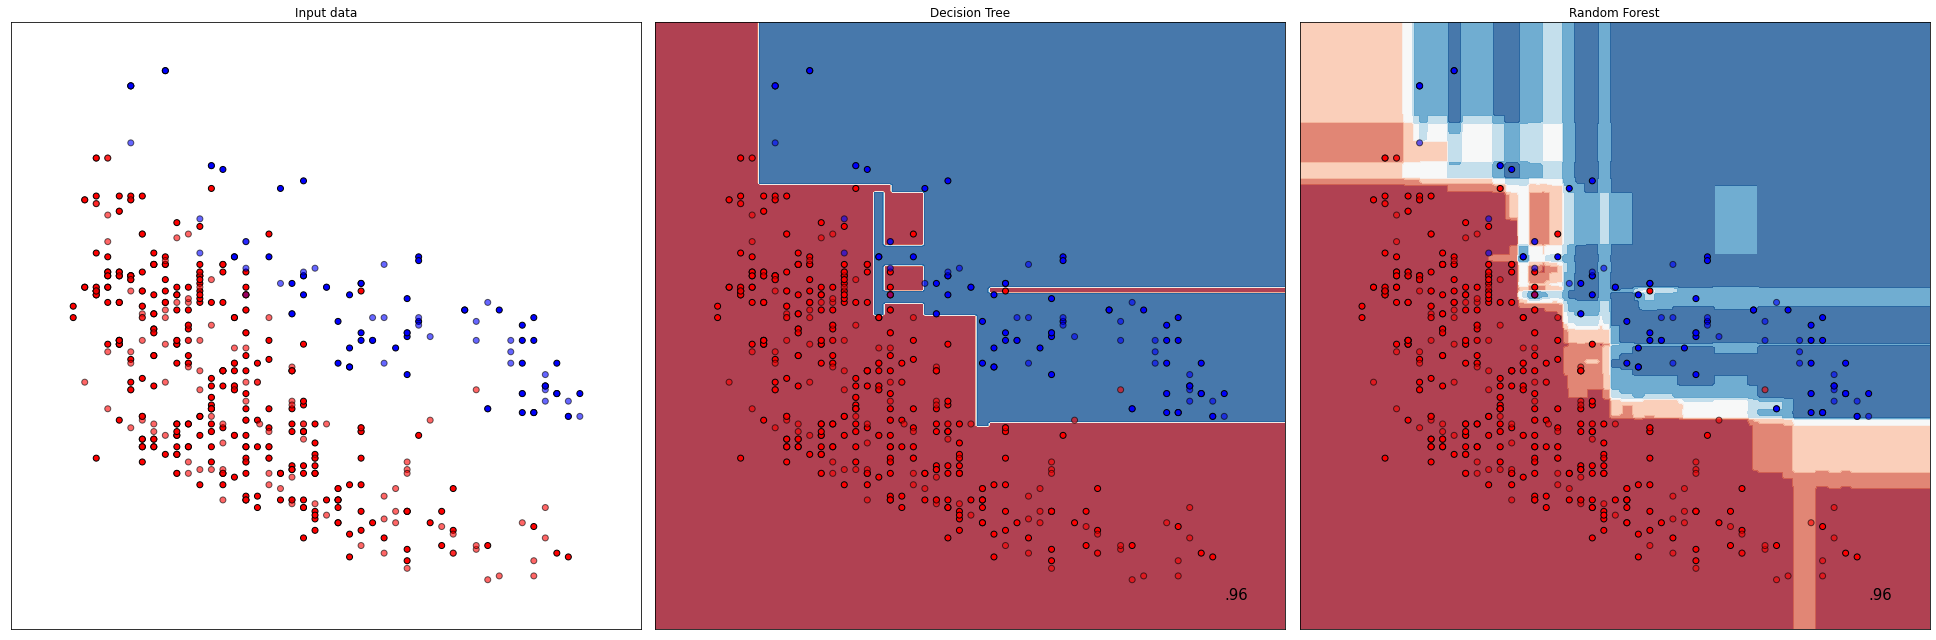

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

h = .02  # step size in the mesh

names = ["Decision Tree", "Random Forest"]

classifiers = [
    DecisionTreeClassifier(), # you can add more model
    RandomForestClassifier(n_estimators=20)]

X = wine[['alcohol','density']]
y = wine['label']
linearly_separable = (X, y)

datasets = [
            linearly_separable # you can add more dataset
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

# Boosting

In [23]:
# !pip install xgboost

In [36]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import classification_report, plot_roc_curve, plot_precision_recall_curve

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree


## Data

In [2]:
df_adult= pd.read_csv('adult.csv')

In [3]:
df_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Adult dataset memiliki missing value yang ditandai dengan '?' pada kolom workclass, occupation, native.country

## Preprocessing

preprocessing scheme:
* one hot encoding: relationship, sex, race
* binary encoding: workclass, marital.status, occupation, native.country
* ordinal encoding: education (already encoded)
* no treatment: the rest

out: fnlwgt

In [6]:
binary_encoder_pipeline = Pipeline([
                                    ('imputer',SimpleImputer(strategy = 'constant',fill_value = 'NC', missing_values='?')),
                                    ('binary encoder',ce.BinaryEncoder())
])

transformer = ColumnTransformer([
                                 ('one hot encoder',OneHotEncoder(drop = 'first'),['relationship','race','sex']),
                                 ('binary encoder',binary_encoder_pipeline,['workclass','marital.status','occupation','native.country'])
                                ], remainder = 'passthrough')

## Data splitting

In [7]:
X=df_adult.drop(['fnlwgt','education','income'], axis=1)
y=np.where(df_adult['income']=='>50K',1,0)

In [8]:
X_train, X_test,y_train,y_test= train_test_split(
    X,y,
    stratify=y,
    random_state=10
)

## Model Fitting and evaluation: Decision Tree

In [10]:
dt=DecisionTreeClassifier(max_depth=3)
pipe_tree= Pipeline([('transformer', transformer),('model',dt)])

In [11]:
pipe_tree.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one hot encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['relationship', 'race',
                                                   'sex']),
                                                 ('binary encoder',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='NC',
                                                                                 missing_values='?',
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                     

In [12]:
y_pred= pipe_tree.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6181
           1       0.68      0.53      0.59      1960

    accuracy                           0.83      8141
   macro avg       0.77      0.72      0.74      8141
weighted avg       0.82      0.83      0.82      8141



### Model properties: Feature importance

In [20]:
pipe_tree[0].transformers_[0][1].get_feature_names()

array(['x0_Not-in-family', 'x0_Other-relative', 'x0_Own-child',
       'x0_Unmarried', 'x0_Wife', 'x1_Asian-Pac-Islander', 'x1_Black',
       'x1_Other', 'x1_White', 'x2_Male'], dtype=object)

In [27]:
features= list(pipe_tree[0].transformers_[0][1].get_feature_names()) + pipe_tree[0].transformers_[1][1][1].get_feature_names()+ ['age', 'education.num','capital.gain','capital.loss','hours.per.week'] 

In [33]:
importance_tab=pd.DataFrame(pipe_tree[1].feature_importances_, columns=['imp'],index=features)

In [34]:
importance_tab

,imp
x0_Not-in-family,0.000000
x0_Other-relative,0.000000
x0_Own-child,0.000000
x0_Unmarried,0.000000
x0_Wife,0.000000
x1_Asian-Pac-Islander,0.000000
x1_Black,0.000000
x1_Other,0.000000
x1_White,0.000000
x2_Male,0.000000


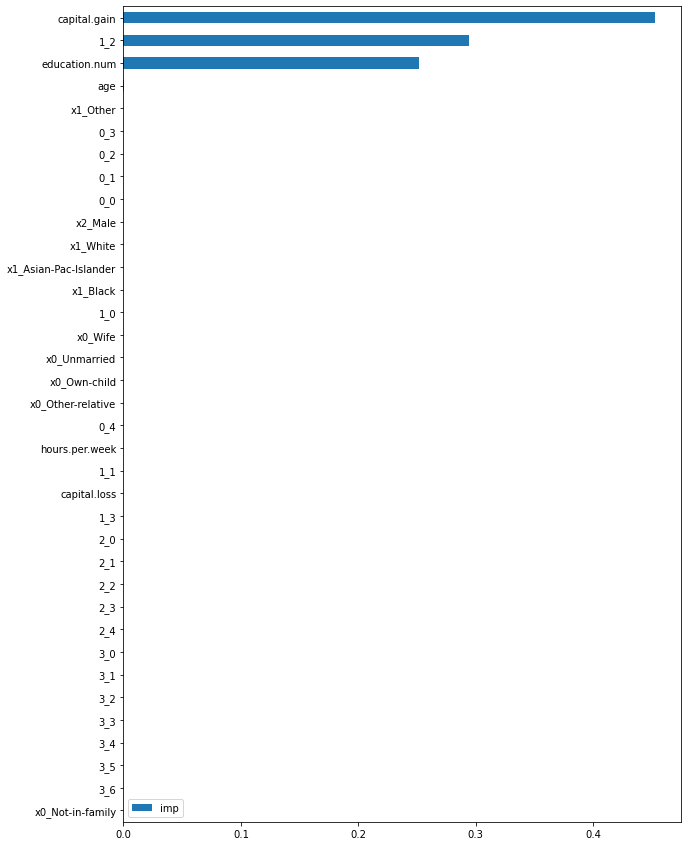

In [35]:
importance_tab.sort_values('imp').plot(kind='barh', figsize=(10,15))

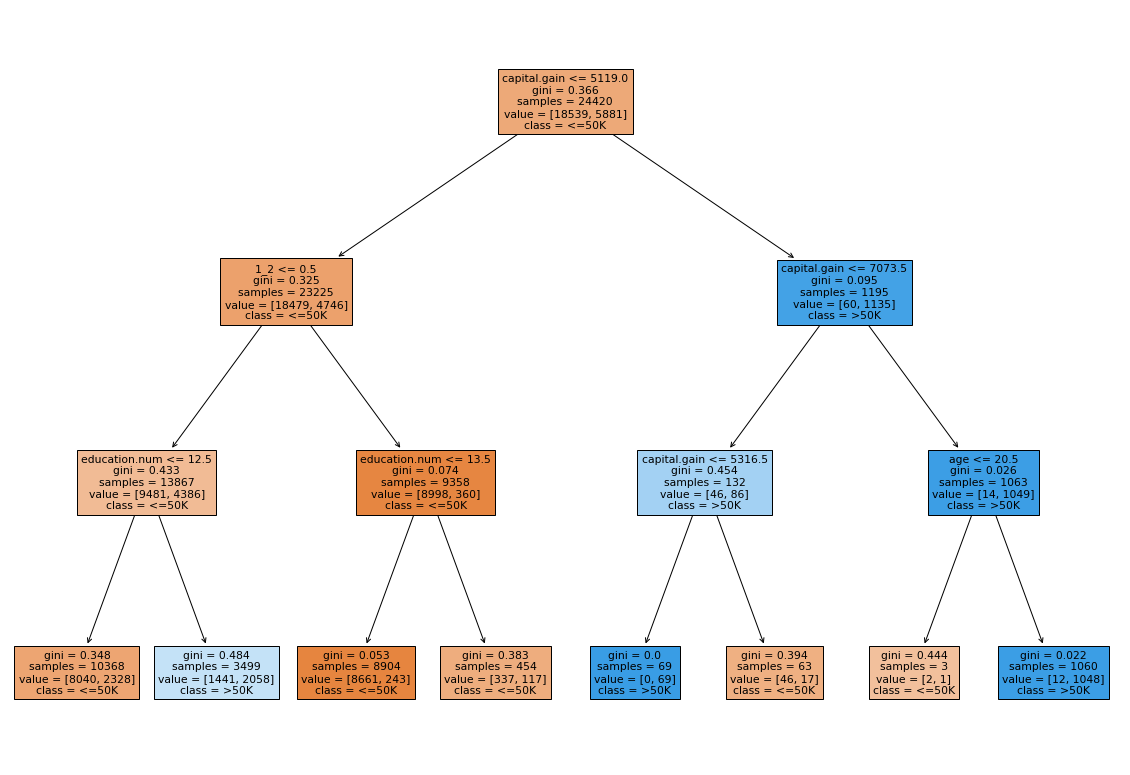

In [38]:
plt.figure(figsize=(20,14))
plot_tree(pipe_tree[1], feature_names=features, filled= True, class_names=['<=50K','>50K'] )
plt.show()

## Model Fitting and evaluation: Adaptive Boosting

In [40]:
tree= DecisionTreeClassifier(max_depth=3)
model= AdaBoostClassifier(
    tree,
    n_estimators=200,
    learning_rate=0.1,
    random_state=10
)

pipe_ada= Pipeline([('transformer', transformer),('model', model)])

In [42]:
pipe_ada.fit(X_train,y_train)
y_pred= pipe_ada.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      6181
           1       0.78      0.63      0.70      1960

    accuracy                           0.87      8141
   macro avg       0.84      0.79      0.81      8141
weighted avg       0.86      0.87      0.86      8141



### Model properties: Feature importance

In [46]:
importance_tab= pd.DataFrame({'imp':pipe_ada[1].feature_importances_},index=features)

In [47]:
importance_tab

,imp
x0_Not-in-family,0.009602
x0_Other-relative,0.009289
x0_Own-child,0.014575
x0_Unmarried,0.010174
x0_Wife,0.030319
x1_Asian-Pac-Islander,0.009420
x1_Black,0.011038
x1_Other,0.004983
x1_White,0.006060
x2_Male,0.025846


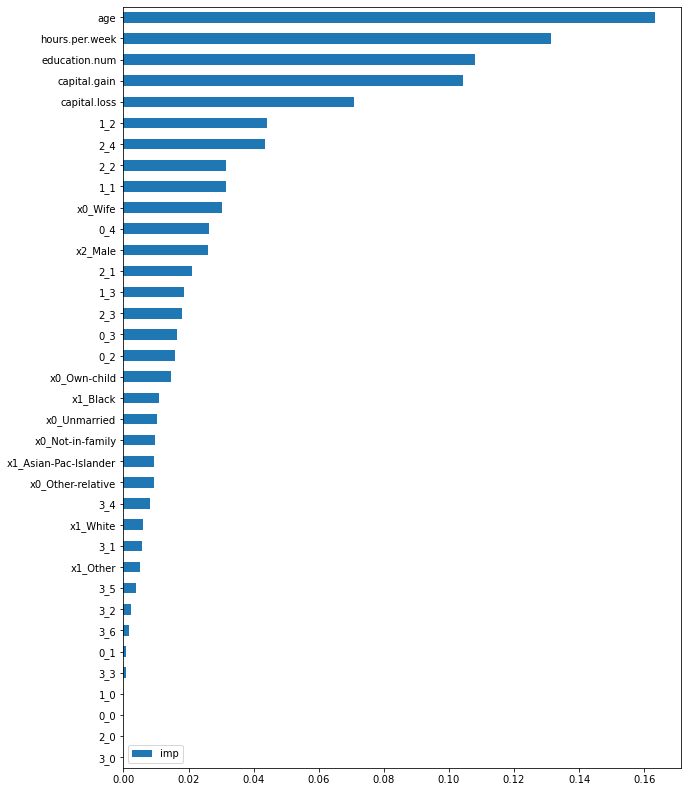

In [49]:
importance_tab.sort_values('imp').plot(kind='barh',figsize=(10,14))

## Model Fitting and evaluation: Gradient Boosting

In [51]:
model= GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=10
)
pipe_grad= Pipeline([('transformer',transformer),('model',model)])

In [52]:
pipe_grad.fit(X_train,y_train)
y_pred= pipe_grad.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      6181
           1       0.79      0.61      0.69      1960

    accuracy                           0.87      8141
   macro avg       0.84      0.78      0.80      8141
weighted avg       0.86      0.87      0.86      8141



### Model Properties

In [54]:
importance_tab= pd.DataFrame({'imp':pipe_grad[1].feature_importances_},index=features)

In [55]:
importance_tab

,imp
x0_Not-in-family,0.004850
x0_Other-relative,0.000241
x0_Own-child,0.001212
x0_Unmarried,0.001823
x0_Wife,0.008601
x1_Asian-Pac-Islander,0.000321
x1_Black,0.000388
x1_Other,0.000033
x1_White,0.000492
x2_Male,0.009060


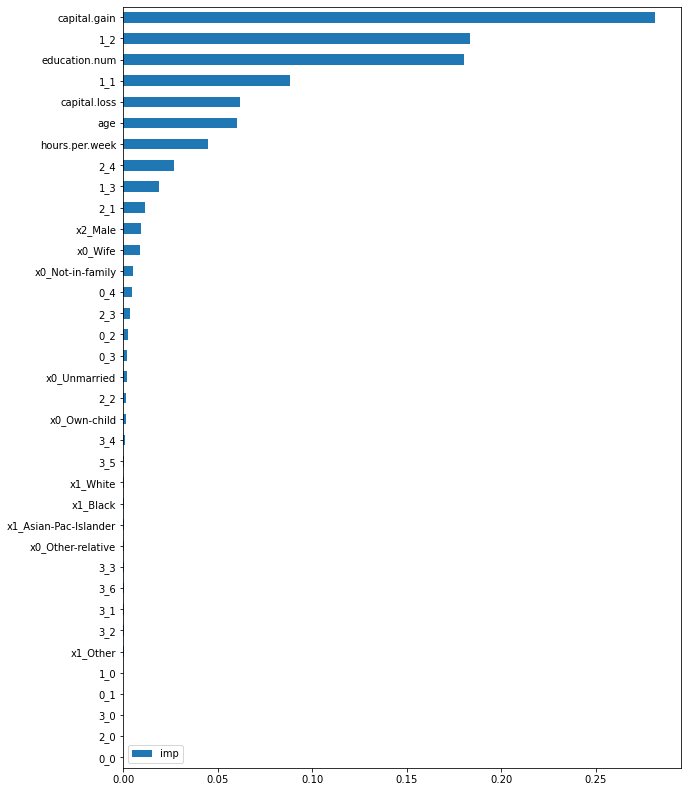

In [57]:
importance_tab.sort_values('imp').plot(kind='barh', figsize=(10,14))

## Model Fitting and evaluation: Extreme Gradient Boosting

In [60]:
model= XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=10
)
pipe_XGB=Pipeline([('transformer',transformer),('model',model)])

In [61]:
pipe_XGB.fit(X_train,y_train)
y_pred=pipe_XGB.predict(X_test)
print(classification_report(y_test,y_pred))

C:\Users\brigi\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[21:40:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6181
           1       0.79      0.61      0.69      1960

    accuracy                           0.87      8141
   macro avg       

### Model properties

In [63]:
importance_tab= pd.DataFrame({'imp':pipe_XGB[1].feature_importances_},index=features)

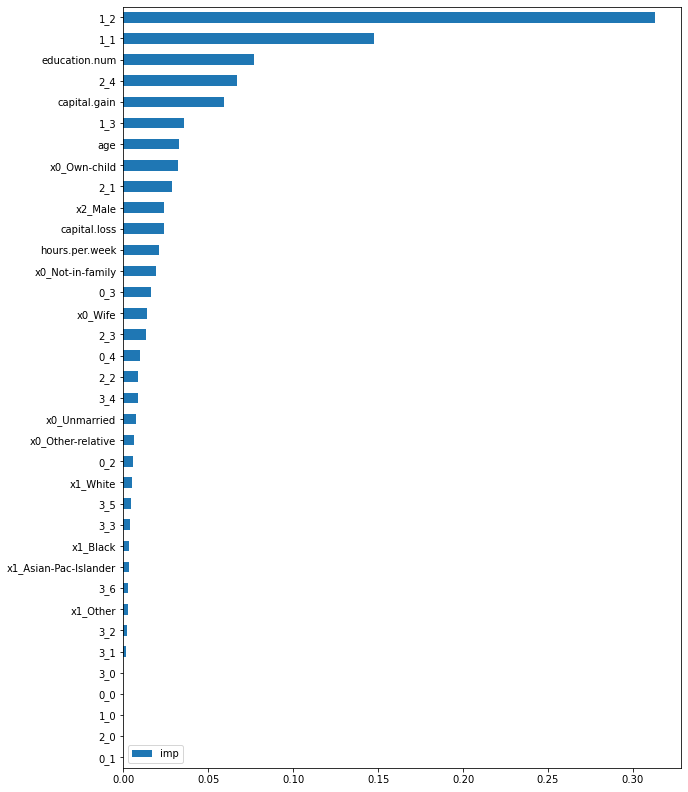

In [64]:
importance_tab.sort_values('imp').plot(kind='barh',figsize=(10,14))

In [ ]:
Tugas: 

Pilihlah model terbaik dari 4 model di berikut sebagai benchmark model:
* Decision Tree
* Adaboost
* gradient boost
* XGboost  

Lakukan hyperparameter tunning dengan hyperparameter berikut:

hyperparam_space = [  
                    {'clf__learning_rate':[0.1],'clf__n_estimators':[200],'clf__base_estimator__max_depth':[3,4,5]},  
                    {'clf__learning_rate':[0.05],'clf__n_estimators':[400],'clf__base_estimator__max_depth':[3,4,5]},  
                    {'clf__learning_rate':[0.01],'clf__n_estimators':[2000],'clf__base_estimator__max_depth':[3,4,5]},  
                    {'clf__learning_rate':[0.005],'clf__n_estimators':[4000],'clf__base_estimator__max_depth':[3,4,5]}]  

Gunakan f1 score sebagai metric evaluasi

Kalian bisa upload tugas yg sudah kalian buat ke github kalian dan email link github kalian ke: Brigita.gems@gmail.com untuk feedback.
